# Example!!!

In [2]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd
from tools.tools import load
from  matplotlib import rc
from matplotlib.colors import LogNorm
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
import matplotlib
%matplotlib inline
from helium import HELIUM
from deuterium import DEUTERON
from scipy.integrate  import fixed_quad

## Deuteron smearing functions

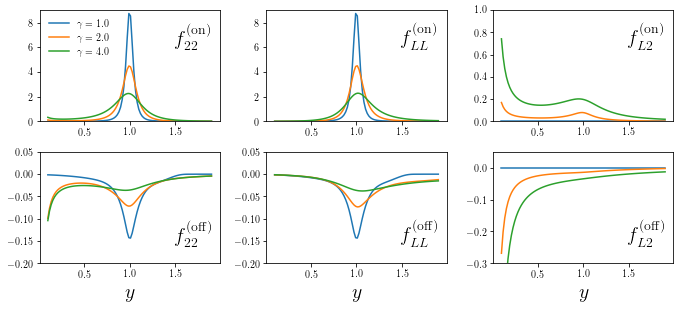

In [2]:
deuteron  = DEUTERON(path2nuctab='./grids/deuteron')
data={'y':np.linspace(0.1,1.9,100)}
#data={'y':np.linspace(0.5,0.7,100)}

for kind in ['onshell','offshell']:
    data[kind]={}
    for fXX in ['f22','fLL','fL2']:
        data[kind][fXX]={}
        for gamm in [1.0,2.0,4.0]:
            data[kind][fXX][gamm]=[deuteron.D['%s-%s'%(fXX,kind)](gamm,y)[0,0] for y in data['y']]

nrows,ncols=2,3
fig = py.figure(figsize=(ncols*3.2,nrows*2.2))
cnt=0
for k in ['onshell','offshell']:
    for fXX in ['f22','fLL','fL2']:
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt) 
        for gamm in sorted(data[k][fXX]):
            ax.plot(data['y'],data[k][fXX][gamm],label='$\gamma=%0.1f$'%gamm)
        if cnt==1: ax.legend(loc=2,frameon=False)
        if 'f22' in fXX and k =='onshell': ax.set_ylim(0,9)
        if 'fLL' in fXX and k =='onshell': ax.set_ylim(0,9)    
        if 'fL2' in fXX and k =='onshell': ax.set_ylim(0,1)    
        if 'f22' in fXX and k =='offshell': ax.set_ylim(-0.2,0.05)
        if 'fLL' in fXX and k =='offshell': ax.set_ylim(-0.2,0.05)    
        if 'fL2' in fXX and k =='offshell': ax.set_ylim(-0.3,0.05)
        idx=fXX.replace('f','')
        label=r'$f^{\rm (%s)}_{%s}$'%(k.replace('shell',''),idx)
        if 'onshell' in k: ax.text(0.75,0.65,label,transform=ax.transAxes,size=20)
        if 'offshell' in k: ax.text(0.75,0.15,label,transform=ax.transAxes,size=20)
        if any([cnt==ii for ii in [4,5,6]]): ax.set_xlabel(r'$y$',size=20)
py.tight_layout()

## Helium smearing functions

In [3]:
helium={}
helium['kpsv']=HELIUM(path2nuctab='./grids/helium',group='kpsv')
helium['kpsv'].load_tables()
helium['ss']=HELIUM(path2nuctab='./grids/helium',group='ss')
helium['ss'].load_tables()

data={}
for group in ['kpsv','ss']:
    data[group]={'y':np.linspace(0.5,1.5,100)}
    for kind in ['onshell','offshell']:
        data[group][kind]={}

        for fXX in ['f22p','fLLp','fL2p','f22n','fLLn','fL2n']:
            data[group][kind][fXX]={}
            for gamm in [1.0,1.5,4.0]:
                data[group][kind][fXX][gamm]={}
                data[group][kind][fXX][gamm]['all']=[helium[group].D['%s-%s'%(fXX,kind)](gamm,y)[0,0] for y in data[group]['y']]

        for fXX in ['f22p','fLLp','fL2p']:
            for gamm in [1.0,1.5,4.0]:
                data[group][kind][fXX][gamm]['pole']=[helium[group].D['%s-%s-pole'%(fXX,kind)](gamm,y)[0,0] for y in data[group]['y']]       

        for fXX in ['f22p','fLLp','fL2p','f22n','fLLn','fL2n']:
            for gamm in [1.0,1.5,4.0]:
                data[group][kind][fXX][gamm]['cont']=[helium[group].D['%s-%s-cont'%(fXX,kind)](gamm,y)[0,0] for y in data[group]['y']]        

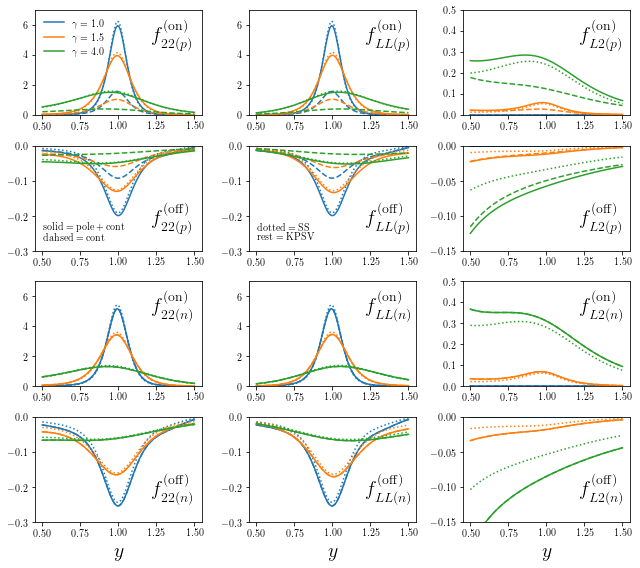

In [22]:
nrows,ncols=4,3
fig = py.figure(figsize=(ncols*3,nrows*2))
group='kpsv'
cnt=0
for N in ['p','n']:
    for k in ['onshell','offshell']:
        for fXX in ['f22'+N,'fLL'+N,'fL2'+N]:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt) 
            for gamm in sorted(data[group][k][fXX]):
                p=ax.plot(data[group]['y'],data[group][k][fXX][gamm]['all'],label='$\gamma=%0.1f$'%gamm)
                color=p[0].get_color()                
                ax.plot(data['ss']['y'],data['ss'][k][fXX][gamm]['all'],color=color,ls=':')
                ax.plot(data[group]['y'],data[group][k][fXX][gamm]['cont'],color=color,ls='--')
                    
            if 'f22' in fXX and k =='onshell': ax.set_ylim(0,7)
            if 'fLL' in fXX and k =='onshell': ax.set_ylim(0,7)    
            if 'fL2' in fXX and k =='onshell': ax.set_ylim(0,0.5)    
            if 'f22' in fXX and k =='offshell': ax.set_ylim(-0.3,0)
            if 'fLL' in fXX and k =='offshell': ax.set_ylim(-0.3,0)    
            if 'fL2' in fXX and k =='offshell': ax.set_ylim(-0.15,0)    
    
            if cnt==1: ax.legend(loc=2,frameon=False)
            if cnt==4: 
                ax.text(0.05,0.2,r'$\rm solid=pole+cont$',transform=ax.transAxes,size=10)
                ax.text(0.05,0.1,r'$\rm dahsed=cont$',transform=ax.transAxes,size=10)
            if cnt==5: 
                ax.text(0.05,0.2,r'$\rm dotted=SS$',transform=ax.transAxes,size=10)
                ax.text(0.05,0.1,r'$\rm rest=KPSV$',transform=ax.transAxes,size=10)

            idx=fXX.replace('f','').replace('p','').replace('n','')
            label=r'$f^{\rm (%s)}_{%s(%s)}$'%(k.replace('shell',''),idx,N)
            if 'on' in k: ax.text(0.7,0.65,label,transform=ax.transAxes,size=20)
            if 'off' in k: ax.text(0.7,0.2,label,transform=ax.transAxes,size=20)
            if any([cnt==ii for ii in [10,11,12]]): ax.set_xlabel(r'$y$',size=20)
py.tight_layout()

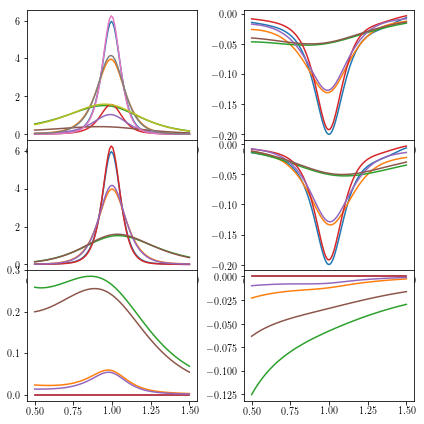

In [17]:
nrows,ncols=3,2
fig = py.figure(figsize=(ncols*3,nrows*2))
group='kpsv'
cnt=0

ax=py.subplot(nrows,ncols,1) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.5]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][4.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.0]['cont'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][1.5]['cont'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['f22p'][4.0]['cont'])

ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][1.0]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][1.5]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['f22p'][4.0]['all'])

ax=py.subplot(nrows,ncols,2) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][1.5]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['f22p'][4.0]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][1.0]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][1.5]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['f22p'][4.0]['all'])

ax=py.subplot(nrows,ncols,3) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLp'][1.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLp'][1.5]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fLLp'][4.0]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['fLLp'][1.0]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['fLLp'][1.5]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['fLLp'][4.0]['all'])

ax=py.subplot(nrows,ncols,4) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][1.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][1.5]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fLLp'][4.0]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][1.0]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][1.5]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['fLLp'][4.0]['all'])

ax=py.subplot(nrows,ncols,5) 
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2p'][1.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2p'][1.5]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['onshell']['fL2p'][4.0]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['fL2p'][1.0]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['fL2p'][1.5]['all'])
ax.plot(data['ss']['y'],data['ss']['onshell']['fL2p'][4.0]['all'])

ax=py.subplot(nrows,ncols,6) 
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2p'][1.0]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2p'][1.5]['all'])
ax.plot(data['kpsv']['y'],data['kpsv']['offshell']['fL2p'][4.0]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['fL2p'][1.0]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['fL2p'][1.5]['all'])
ax.plot(data['ss']['y'],data['ss']['offshell']['fL2p'][4.0]['all'])

py.tight_layout()
py.subplots_adjust(wspace=None, hspace=0)